# Principal Component Analysis and Clustering
Name: Rusheel Chande

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import os
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## 1. Principal Component Analysis

In [3]:
df_data = pd.read_csv("../data/housing_data.csv")
df_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
all_features = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat"]
X = df_data[all_features]
y = df_data["medv"]

### 1.1 Scatterplot & Linear Regression

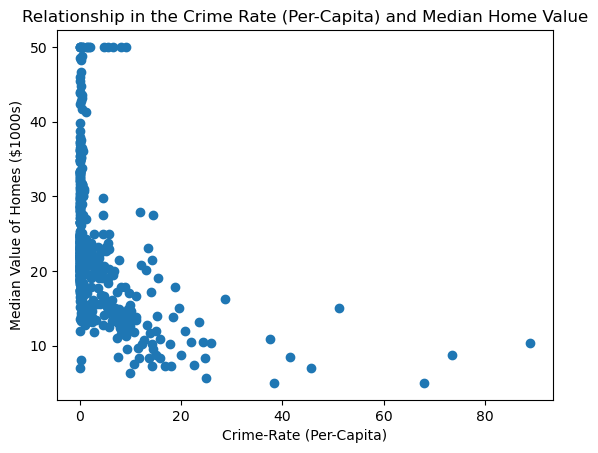

In [5]:
# Scatterplot
plt.scatter(df_data.crim, y)
plt.title("Relationship in the Crime Rate (Per-Capita) and Median Home Value")
plt.xlabel("Crime-Rate (Per-Capita)")
plt.ylabel("Median Value of Homes ($1000s)")
plt.show()

In [6]:
# Linear Regression
X_lr = df_data[["crim"]]

X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.34, random_state=371)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_train, rmse_test

(8.379260361503452, 8.661064606201775)

The root mean squared error (RMSE) is about 8.38 for the training data and approximately 8.66 for the test data. This means that linear regression isn't doing a good job with the predictions

### 1.2 Features and Plots

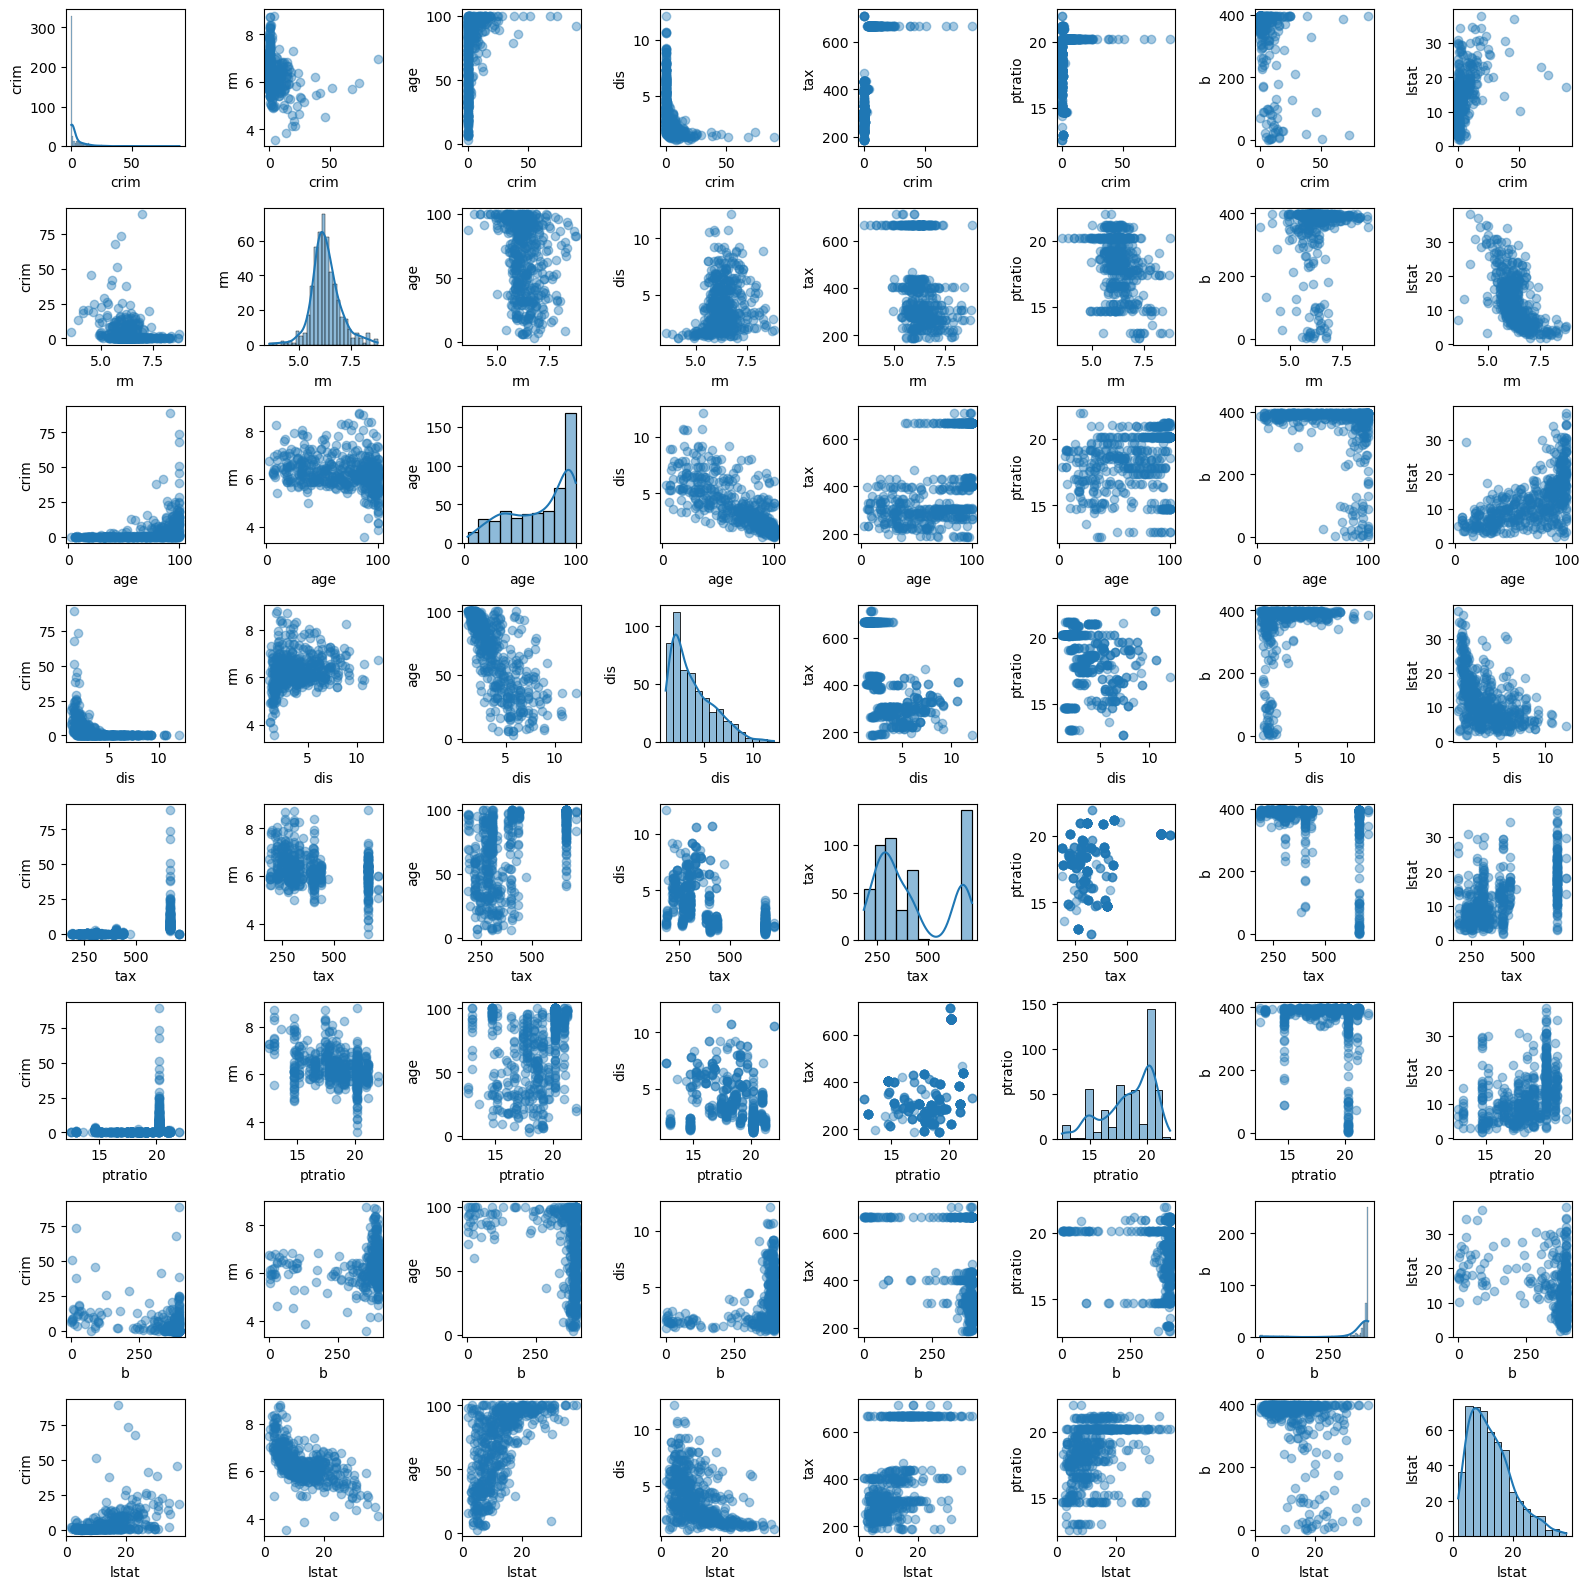

In [7]:
# Features to show relation to each other
sub_features = ["crim", "rm", "age", "dis", "tax", "ptratio", "b", "lstat"]

# 8x8 grid of scatterplots
plt.figure(figsize=(16, 16))
for i in range(8):
    for j in range(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        if i != j:
            plt.scatter(df_data[sub_features[i]], df_data[sub_features[j]], alpha=0.4)
        else:
            sns.histplot(df_data[sub_features[i]], kde=True)
        
        plt.xlabel(sub_features[i])
        plt.ylabel(sub_features[j])

plt.tight_layout()

### 1.3 Principal Component Analysis

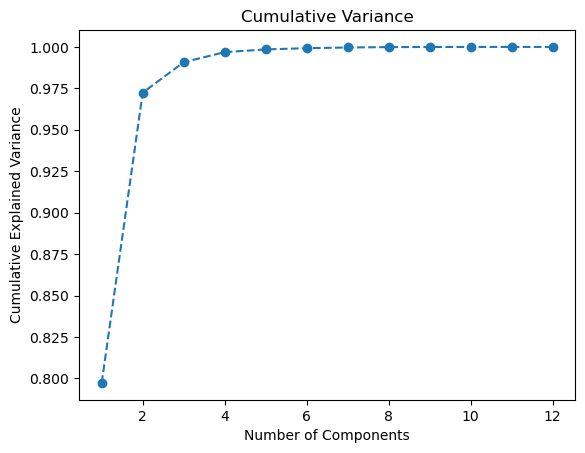

In [8]:
features_for_pca = [feature for feature in all_features]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.34, random_state=371)

pca = PCA(n_components=12)
pca.fit(X_train_pca)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, 13), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

### 1.4 Visualizing the components

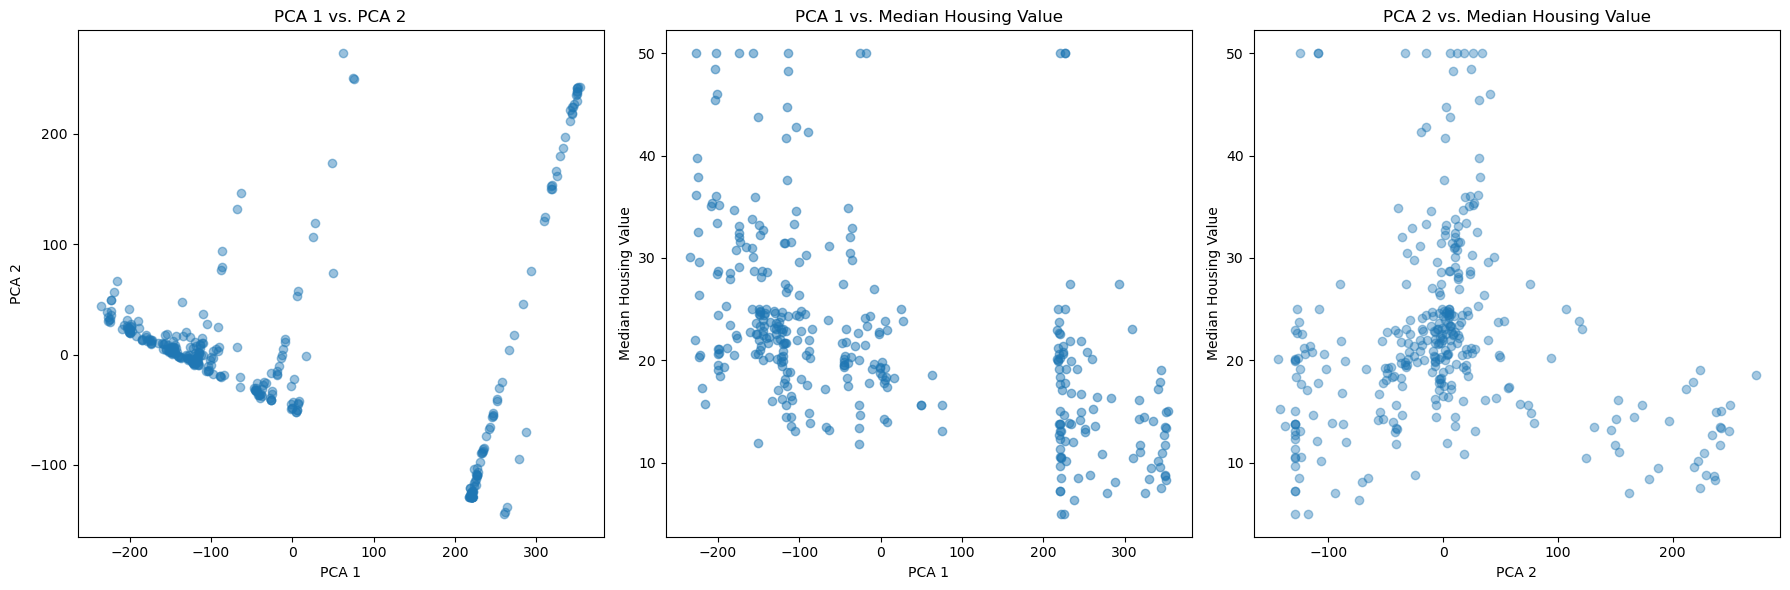

In [9]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_train_pca)
pca1 = X_pca_2[:, 0]
pca2 = X_pca_2[:, 1]

# 1x3 grid
plt.figure(figsize=(18, 6))

# 1.4.a PCA 1 vs. PCA 2
plt.subplot(1, 3, 1)
plt.scatter(pca1, pca2, alpha=0.45)
plt.title("PCA 1 vs. PCA 2")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# 1.4.b PCA 1 vs. median housing value
plt.subplot(1, 3, 2)
plt.scatter(pca1, y_train_pca, alpha=0.5)
plt.title("PCA 1 vs. Median Housing Value")
plt.xlabel("PCA 1")
plt.ylabel("Median Housing Value")

# 1.4.c PCA 2 vs. median housing value
plt.subplot(1, 3, 3)
plt.scatter(pca2, y_train_pca, alpha=0.4)
plt.title("PCA 2 vs. Median Housing Value")
plt.xlabel("PCA 2")
plt.ylabel("Median Housing Value")

plt.tight_layout()
plt.show()

### 1.5 Regression and PCA

In [10]:
pca_1 = PCA(n_components=1)
X_pca_1_train = pca_1.fit_transform(X_train_pca)
X_pca_1_test = pca_1.transform(X_test_pca)

model_pca = LinearRegression()
model_pca.fit(X_pca_1_train, y_train_pca)

y_train_pred_pca = model_pca.predict(X_pca_1_train)
y_test_pred_pca = model_pca.predict(X_pca_1_test)

rmse_train_pca = np.sqrt(mean_squared_error(y_train_pca, y_train_pred_pca))
rmse_test_pca = np.sqrt(mean_squared_error(y_test_pca, y_test_pred_pca))

rmse_train_pca, rmse_test_pca

(7.800225509871347, 8.42459319636539)

The RMSE results show 7.80 for the training set and 8.42 for the test set which suggest that the PCA model, using just the 1st component, provides a slightly better fit for the training data compared to the  lr model using only the "crim" feature which had RMSEs of 8.38 for training and 8.66 for testing. This shows that the first principal component, which gets information from multiple features, is a more effective predictor of median housing prices than the "crim" feature alone. However, the improvement isn't huge. This mean that PCA has condensed the feature space effectively but the complexity and variability of the housing prices requires more than just the first principal component for a better prediction.

## 2. Clustering Images

### 2.1 Decompress and Explore

a) Decompress and inspect the images to get an idea about what we are analyzing. Use whatever image viewer you like. What do you see?

It looks like all the images are visulazations of various topics including business, demographics, finance, voter turnout. These visualizations include bar charts, pie charts, histograms, and graphs.

b) First read all the file names (these are hashcodes) into your code.

In [11]:
file_names = os.listdir("../data/visualizations/")
file_names

['00344c39-0abf-4a9f-9fca-c6f2bb574c55.png',
 '00825f3b-9b46-455c-a77a-d0489c98375d.png',
 '00dbad4d-154f-4386-b1cf-391753d5ed68.png',
 '00e595f5-1ae9-4875-af9b-50d6999700c0.png',
 '01484b14-be64-424a-8737-b61276fc604c.png',
 '0161328a-bf15-414c-914c-fdee06ee2af2.png',
 '0179d1dd-1839-4905-a9bd-bbbe3c202fcc.png',
 '028ba8f0-0db4-470b-81bf-e346a20b7ca5.png',
 '028c47f6-dcc1-4873-bf38-3a14fc541a15.png',
 '029c95e7-3393-4c25-9ca2-1e7e06c3771f.png',
 '02a232d5-ba00-4b4f-a562-364e7befa7cd.png',
 '02a5acac-bd3c-4461-a2aa-ab871c0f8ac2.png',
 '02a8f6f5-d23e-41e1-9d84-6ec336e87bd3.png',
 '02b0c925-fffd-4899-af1d-4f37e23ca8e6.png',
 '0346ef77-155f-4f52-af29-3acb0254dff1.png',
 '038e66a9-1eda-4039-bdc6-c53c8168e756.png',
 '04032b0f-da6d-4b7e-ad16-6794fd9d0865.png',
 '040a66d0-a2c4-42c8-8902-b3a46ea97cee.png',
 '044276c2-3966-4886-b41f-ce20ae420ca0.png',
 '04761724-eb5d-4617-9ed3-14f312587db5.png',
 '04bc5abc-d9cb-4609-a137-7c12c5149940.png',
 '04d1908b-f03d-4832-8259-ff375212c3c1.png',
 '051a664c

In [12]:
len(file_names)

929

There are 929 images in the visualizations folder

### 2.2 Load and Cluster

a)

In [13]:
images = np.random.choice(file_names, 300, replace=False)

im1 = imread(os.path.join("../data/visualizations/", images[0]))
imshape = im1.shape

X = np.empty(shape=(len(images), imshape[0]*imshape[1]*imshape[2]))

for i, img in enumerate(images):
    pixels = imread(os.path.join("../data/visualizations/", img))
    X[i, :] = pixels.ravel()

b)

In [14]:
kmeans = KMeans(n_clusters=5, random_state=371)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=371)

### 2.3 Analyze the Clusters

1)

In [15]:
cluster_labels = kmeans.labels_

2.

In [16]:
def plot_cluster(X, cl, c, imshape):
    plt.figure(figsize=(12, 8))
    plt.suptitle("cluster" + str(c)) 
    Xcl = X[cl == c]
    inds = np.random.choice(len(Xcl), 6)
    
    for i, ind in enumerate(inds):
        ax = plt.subplot(2, 3, i + 1)
        array = Xcl[ind, :].reshape(imshape)
        ax.imshow(array)
        ax.axis("off")

    plt.show()

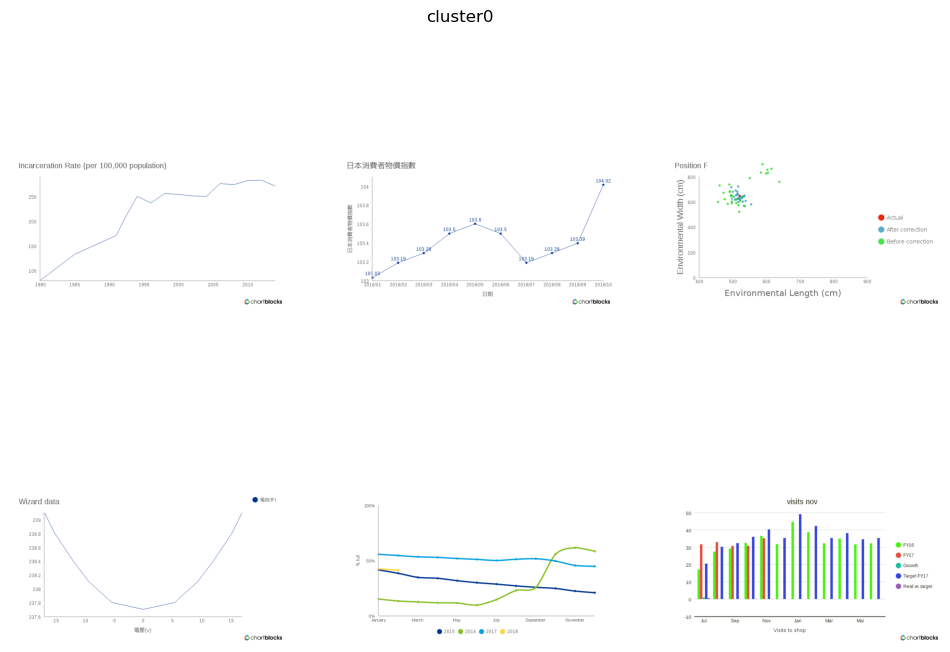

In [17]:
plot_cluster(X, cluster_labels, 0, imshape)

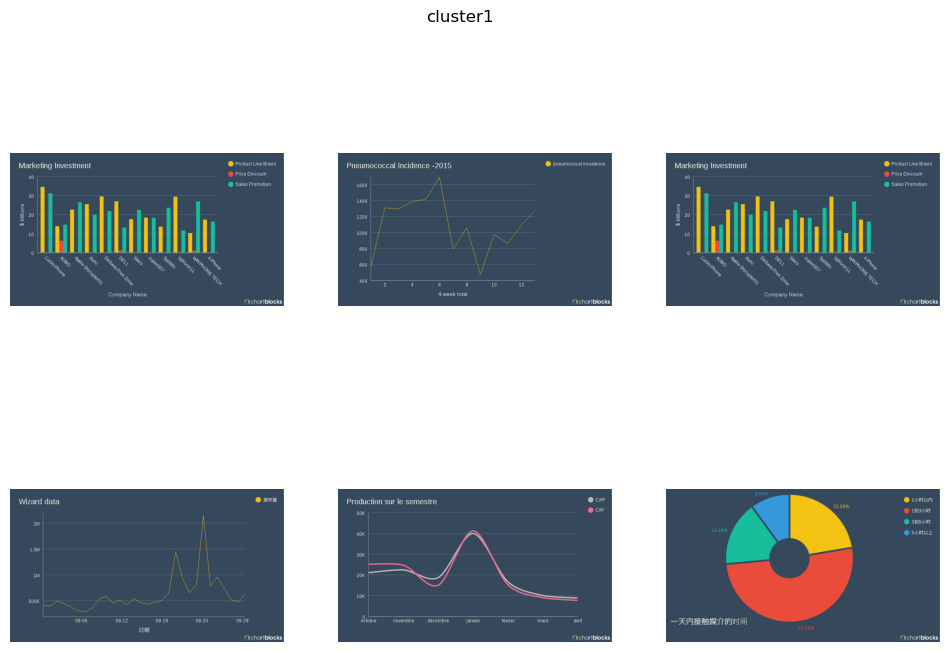

In [18]:
plot_cluster(X, cluster_labels, 1, imshape)

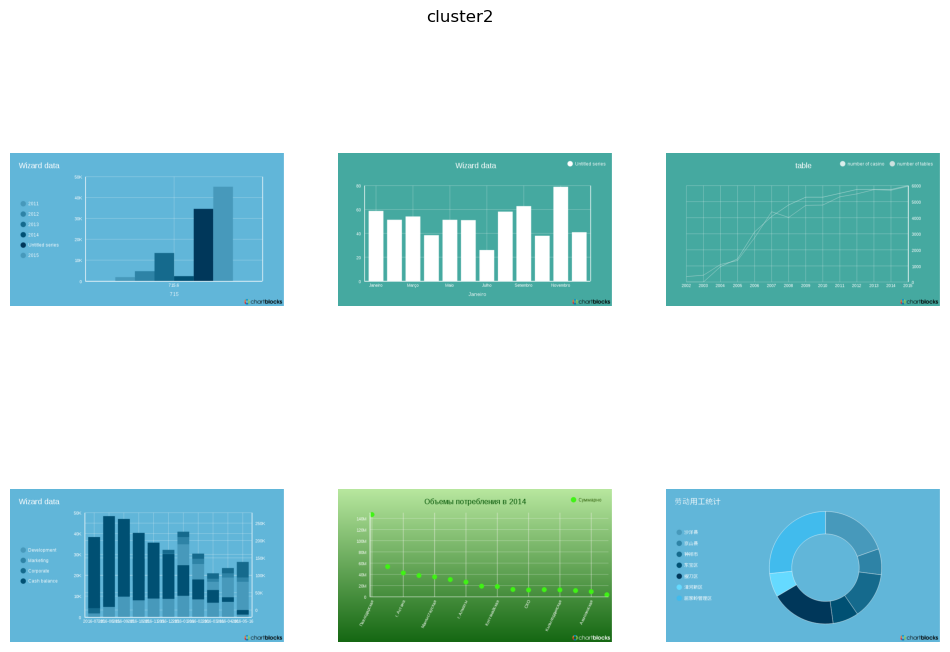

In [20]:
plot_cluster(X, cluster_labels, 2, imshape)

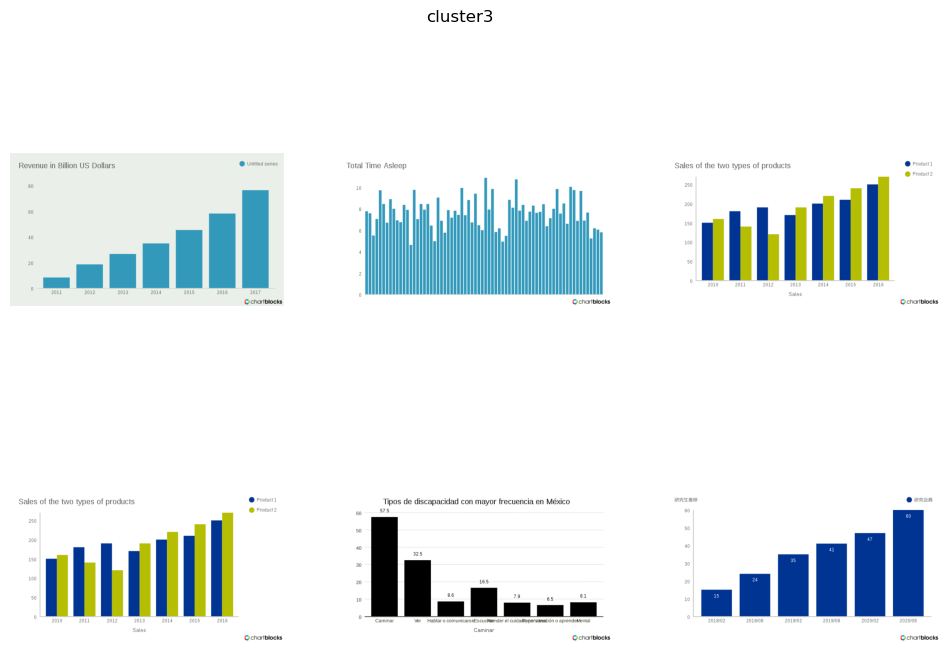

In [21]:
plot_cluster(X, cluster_labels, 3, imshape)

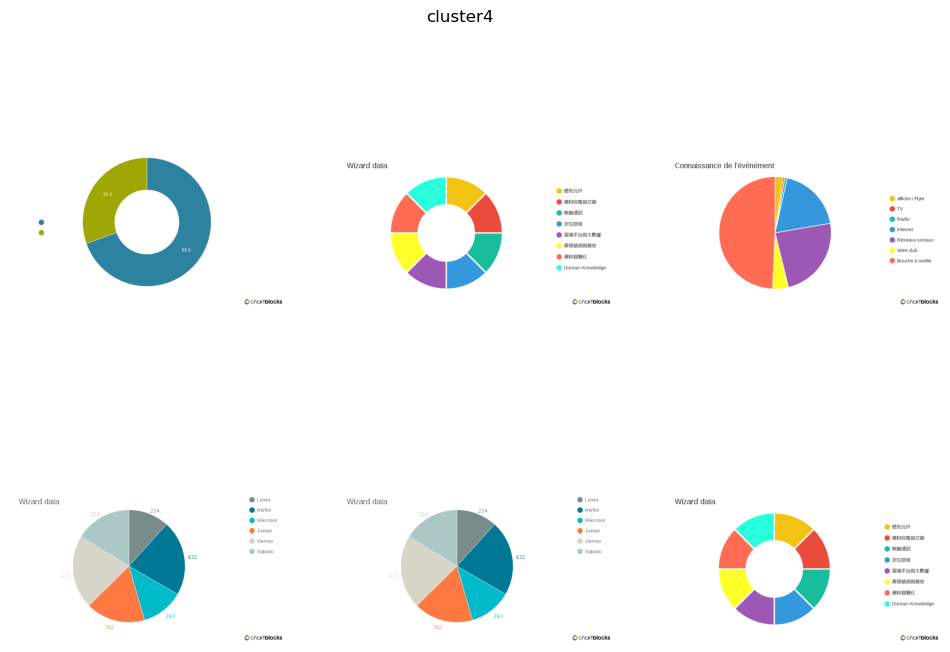

In [22]:
plot_cluster(X, cluster_labels, 4, imshape)

Looking at these clusters, I see that the clusters group primarily based of colors and shapes

3)

I saw that when I increased k, there were more specific clusters and similarities in the charts, and when I lowered k, the clusters became more general. I also saw that when increasing k, the clusters group around color and shapes mostly.

## 3. Images: Reducing the # of Colors

1.

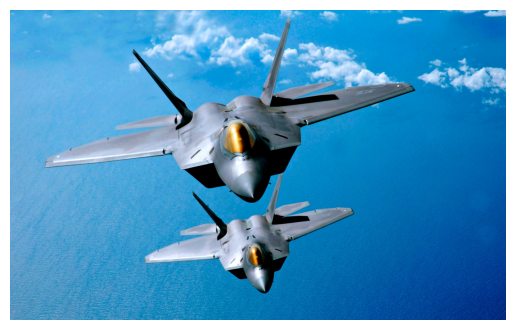

In [23]:
pixels = imread("../data/f22.jpg")
ax = plt.axes()
ax.set_aspect("equal")
plt.imshow(pixels)
plt.axis("off")
plt.show()

In [24]:
def reduce_colors(image, num_colors):
    """
    Reduces the number of colors in an image to "num_colors" using k-means clustering.
    
    Arguments:
    image: The input image.
    num_colors: The number of colors to reduce the image to.

    Returns:
    numpy.ndarray: The color-reduced image.
    """
    
    # Reshaping the image for clustering
    pixels = image.reshape((-1, image.shape[2]))

    # Applying k-means clustering
    kmeans = KMeans(n_clusters=num_colors).fit(pixels)
    cl = kmeans.predict(pixels)
    centers = kmeans.cluster_centers_

    # Converting each pixel to its cluster center color
    compressed = centers[cl]/255
    compressed_image = compressed.reshape(image.shape)

    return compressed_image

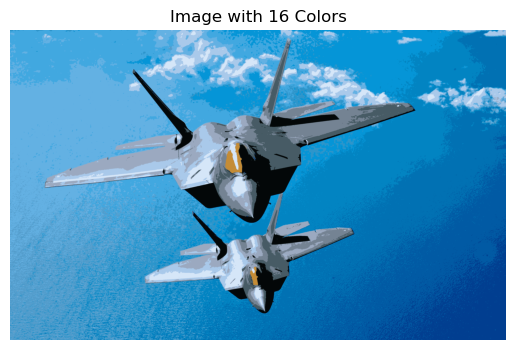

In [94]:
image_16_colors = reduce_colors(pixels, 16)

# Display the image with 16 colors
plt.imshow(image_16_colors)
plt.title("Image with 16 Colors")
plt.axis("off")
plt.show()

2.

a) The shape of pixels tells you the dimensions of the image in terms of its width, height, and the number of color channels, rgb.

b) M is a reshaped version of the pixels matrix. Each row represents a pixel and each column represents one of the rgb color channels.

c) cl contains the cluster assignments for each pixel. If cl[12345] = 2, it means that the pixel at index 12345 in the flattened image matrix M has been put to cluster 2.

d) The center color values are the rgb values of the centroids of the clusters found by the k-means.

e) There are as many center color values as there are clusters. K-means with k=16 above means there will be 16 center color values. Each one represents the average color of a cluster.

3.

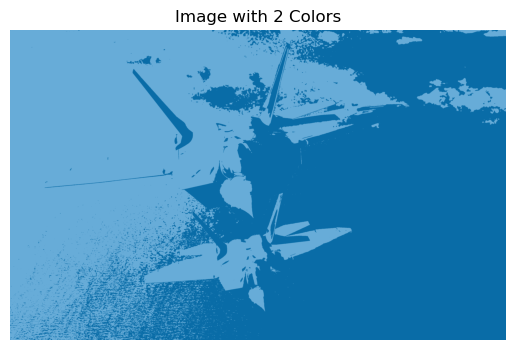

In [25]:
image_2_colors = reduce_colors(pixels, 2)

# Display the image with 16 colors
plt.imshow(image_2_colors)
plt.title("Image with 2 Colors")
plt.axis("off")
plt.show()

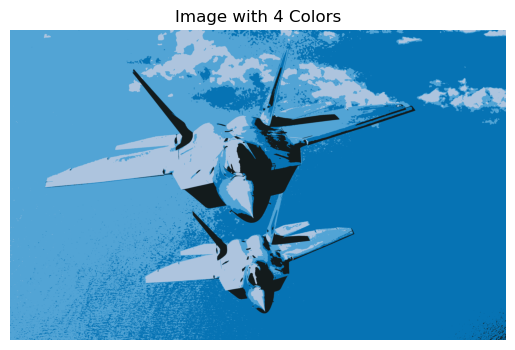

In [26]:
image_4_colors = reduce_colors(pixels, 4)

# Display the image with 16 colors
plt.imshow(image_4_colors)
plt.title("Image with 4 Colors")
plt.axis("off")
plt.show()

**I spent 5 hours on this assignment**